In [1]:
import pandas as pd
from textblob import TextBlob

In [3]:
# Load the dataset
df = pd.read_csv('filtered_reviews(Apple iPhone 4s).csv')

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0                                       Product Name  Brand Name  \
0       16429  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...         NaN   
1       16430  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...         NaN   
2       16431  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...         NaN   
3       16432  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...         NaN   
4       16433  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...         NaN   

   Price  Rating                                            Reviews  \
0  99.99       5                                           good buy   
1  99.99       5                              great phonegood price   
2  99.99       1  I bought and send to Africa the two are not wo...   
3  99.99       4                    Had difficulty connecting to wf   
4  99.99       5                                          very good   

   Review Votes  wordCount Sentiment  Polarity Sentiment_Accuracy  
0           0.0         

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing review
df.dropna(subset=['Reviews'], inplace=True)

# Select necessary columns
reviews = df['Reviews']

Unnamed: 0               0
Product Name             0
Brand Name            1448
Price                    0
Rating                   0
Reviews                  0
Review Votes            88
wordCount                0
Sentiment                0
Polarity                 0
Sentiment_Accuracy       0
dtype: int64


In [7]:
#Task1 the analyzer function
def sentimentAnalyzer(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    
    if score < -0.2:
        return 'Negative'
    elif -0.2 <= score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

In [50]:
#Task 2: Verify that the function by passing the following words
test_words = {
    "happy": "Positive",
    "animal": "Neutral",
    "good": "Positive",
    "rich": "Positive",
    "smile": "Positive",
    "sad": "Negative",
    "bad": "Negative",
    "poor": "Negative",
    "anger": "Negative",
    "food": "Neutral",
    "disappointed": "Negative",
    "exciting": "Positive"
}

for word, expected_sentiment in test_words.items():
    result = sentimentAnalyzer(word)
    print(f"Word: {word}, \t\tExpected: {expected_sentiment}, \t\tResult: {result}")


Word: happy, 		Expected: Positive, 		Result: Positive
Word: animal, 		Expected: Neutral, 		Result: Neutral
Word: good, 		Expected: Positive, 		Result: Positive
Word: rich, 		Expected: Positive, 		Result: Positive
Word: smile, 		Expected: Positive, 		Result: Positive
Word: sad, 		Expected: Negative, 		Result: Negative
Word: bad, 		Expected: Negative, 		Result: Negative
Word: poor, 		Expected: Negative, 		Result: Negative
Word: anger, 		Expected: Negative, 		Result: Negative
Word: food, 		Expected: Neutral, 		Result: Neutral
Word: disappointed, 		Expected: Negative, 		Result: Negative
Word: exciting, 		Expected: Positive, 		Result: Positive


In [21]:
# Task3 to choose product has at least 1000 reviews
def find_products_with_reviews(df):
    products = df['Product Name'].value_counts()
    products = products[products >= 1000]
    
    if not products.empty:
        selected_product = products.index[0]
        return selected_product 
    else:
        print("No products found with at least 1000 reviews.")
        return None

In [11]:
# Task3 to show data related to the product

# Get the selected product with at least 1000 reviews
selected_product = find_products_with_reviews(df) #Assign the returned value from the function

# Check if selected_product is not None before proceeding
if selected_product: 
    
    filtered_df = df.loc[df['Product Name'] == selected_product].copy()

    def productInfo():
        print("Product Name: {}".format(selected_product))
        print("Number of Rows: {}".format(filtered_df.shape[0]))
        print("Number of Columns: {}".format(filtered_df.shape[1]))

        # Calculate review lengths
        filtered_df['wordCount'] = filtered_df['Reviews'].apply(lambda x: len(x.split()))
        print("Length of Shortest Review (in words): {}".format(filtered_df['wordCount'].min()))
        print("Length of Longest Review (in words): {}".format(filtered_df['wordCount'].max()))
        print("Average Length of Review (in words): {:.0f}".format(filtered_df['wordCount'].mean()))

    productInfo()
else: 
    print("No product with at least 1000 reviews was selected.")


Product Name: Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Number of Rows: 1448
Number of Columns: 11
Length of Shortest Review (in words): 1
Length of Longest Review (in words): 297
Average Length of Review (in words): 20


In [13]:
# Task4 Apply the sentimentAnalyzer Function
filtered_df['Sentiment'] = filtered_df['Reviews'].apply(sentimentAnalyzer)

print(filtered_df[['Reviews', 'Sentiment']].head())

                                             Reviews Sentiment
0                                           good buy  Positive
1                              great phonegood price  Positive
2  I bought and send to Africa the two are not wo...   Neutral
3                    Had difficulty connecting to wf   Neutral
4                                          very good  Positive


In [15]:
#SARAHMOD
#Here are the exact valuse and next cell will be the graph.
# Task 5: Using visualization 
sentiment_counts = filtered_df['Sentiment'].value_counts()
print(sentiment_counts)

# Plotting the sentiment distribution
#sentiment_counts.plot(kind='bar', title='Sentiment Distribution')

Sentiment
Positive    768
Neutral     570
Negative    110
Name: count, dtype: int64


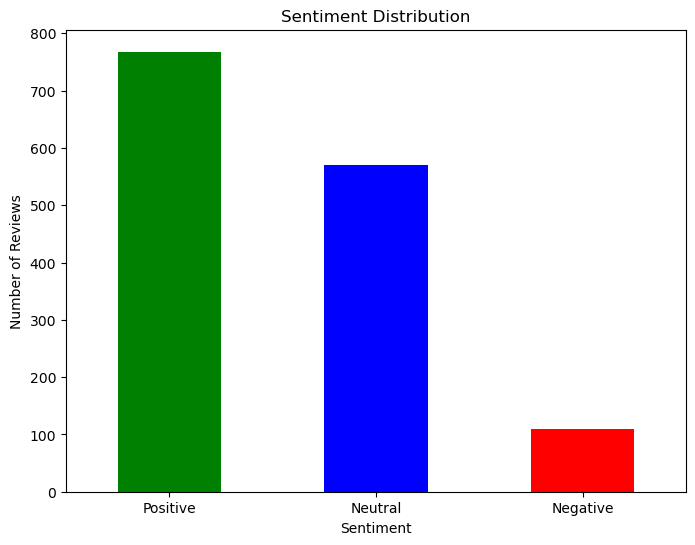

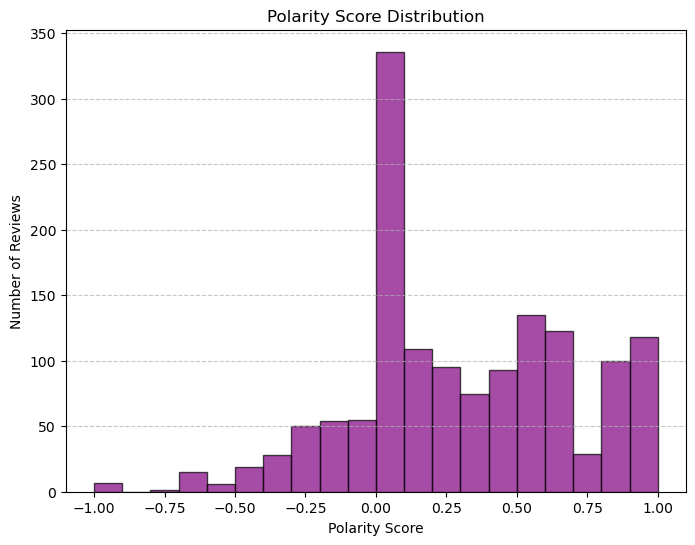

Positive Review Example:
Review: good buy
Polarity: 0.7

Neutral Review Example:
Review: I bought and send to Africa the two are not working
Polarity: 0.0

Negative Review Example:
Review: Bad batery
Polarity: -0.6999999999999998

Examples of Mismatches:
                                              Reviews  Rating Sentiment
2   I bought and send to Africa the two are not wo...       1   Neutral
3                     Had difficulty connecting to wf       4   Neutral
7   Do not buy this phone. it is used, no head pho...       1   Neutral
10  sometimes the sound on videos , music & keyboa...       2   Neutral
11  Wifi couldnt be enabled. Apparently had a hard...       1   Neutral

Insights for the Client:
- Out of 1448 reviews, 110 (7.60%) are Negative.
- Consider analyzing negative reviews to identify recurring issues (e.g., product quality, delivery issues).
- Positive reviews suggest areas of strength; focus marketing efforts on these points.
- Regularly monitor feedback and respond p

In [17]:
# Task 5: Visualization and Analysis

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt



# Count the sentiment distribution
sentiment_counts = filtered_df['Sentiment'].value_counts()

# Plotting the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


# Visualizing polarity scores
filtered_df['Polarity'] = filtered_df['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['Polarity'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#2
# (**Display examples of Positive, Neutral, and Negative reviews with polarity scores)

# Extract and display examples of reviews for each sentiment type
positive_review = filtered_df[filtered_df['Sentiment'] == 'Positive'].iloc[0]
neutral_review = filtered_df[filtered_df['Sentiment'] == 'Neutral'].iloc[0]
negative_review = filtered_df[filtered_df['Sentiment'] == 'Negative'].iloc[0]

# Print the reviews along with their polarity scores:
print("Positive Review Example:")
print(f"Review: {positive_review['Reviews']}")
print(f"Polarity: {TextBlob(positive_review['Reviews']).sentiment.polarity}")
print("\nNeutral Review Example:")
print(f"Review: {neutral_review['Reviews']}")
print(f"Polarity: {TextBlob(neutral_review['Reviews']).sentiment.polarity}")
print("\nNegative Review Example:")
print(f"Review: {negative_review['Reviews']}")
print(f"Polarity: {TextBlob(negative_review['Reviews']).sentiment.polarity}")



#4 (Identify examples where TextBlob misclassified sentiment and explain why)
# Cross-reference TextBlob sentiment with the rating column to identify mismatches:
def assess_sentiment_accuracy(row):
    rating = row['Rating']
    sentiment = row['Sentiment']
    if rating >= 4 and sentiment != 'Positive':
        return 'Mismatch'
    elif rating == 3 and sentiment != 'Neutral':
        return 'Mismatch'
    elif rating <= 2 and sentiment != 'Negative':
        return 'Mismatch'
    return 'Match'

# Create a new column to assess sentiment accuracy
filtered_df['Sentiment_Accuracy'] = filtered_df.apply(assess_sentiment_accuracy, axis=1)


# Display mismatched examples
mismatches = filtered_df[filtered_df['Sentiment_Accuracy'] == 'Mismatch']
print("\nExamples of Mismatches:")
print(mismatches[['Reviews', 'Rating', 'Sentiment']].head())

#3 (Analyze the results and provide actionable advice to minimize negative sentiment and improve reputation)

#Calculate the percentage of negative reviews
negative_count = sentiment_counts.get('Negative', 0)
total_reviews = sentiment_counts.sum()
negative_percentage = (negative_count / total_reviews) * 100 if total_reviews else 0

#D isplay insights for the client:
print("\nInsights for the Client:")
print(f"- Out of {total_reviews} reviews, {negative_count} ({negative_percentage:.2f}%) are Negative.")
print("- Consider analyzing negative reviews to identify recurring issues (e.g., product quality, delivery issues).")
print("- Positive reviews suggest areas of strength; focus marketing efforts on these points.")
print("- Regularly monitor feedback and respond promptly to negative reviews to enhance customer satisfaction.")


In [19]:
# Export the DataFrame to a CSV file
filtered_df.to_csv('filtered_reviews.csv')